<a href="https://colab.research.google.com/github/DAASHeo/Contents_Bigdata/blob/main/20200788_%ED%97%88%EC%9D%80_batter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 학과 : IT미디어공학전공

# 학번 : 20200788

# 이름 : 허은 

# 임포트 및 한글 설정


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
import warnings
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install statsmodels
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
plt.rc('font', family='NanumGothic')

In [4]:
warnings.filterwarnings("ignore")
batter_file_path=files.upload()
batter=pd.read_csv(io.BytesIO(batter_file_path['batter_stats_2017.csv']))

Saving batter_stats_2017.csv to batter_stats_2017 (5).csv


# 기초 정보

In [5]:
print(batter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    float64
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [6]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [7]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.390,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [8]:
batter.shape


(191, 21)

In [9]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

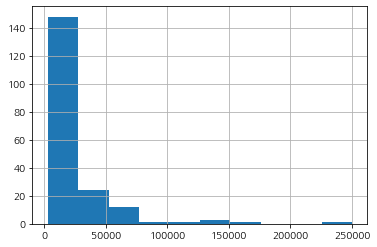

In [10]:
batter['연봉(2018)'].hist(bins=10)

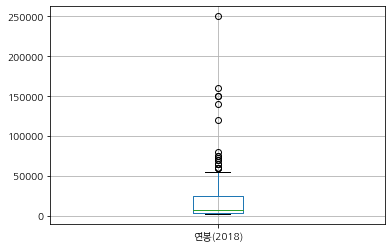

In [11]:
batter.boxplot(column=['연봉(2018)'])
plt.rc('font',family='NanumGothic')

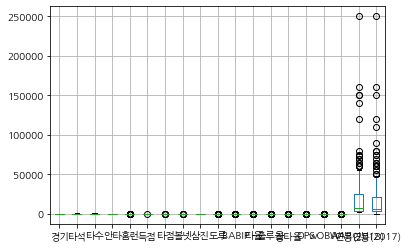

In [12]:
batter.boxplot()


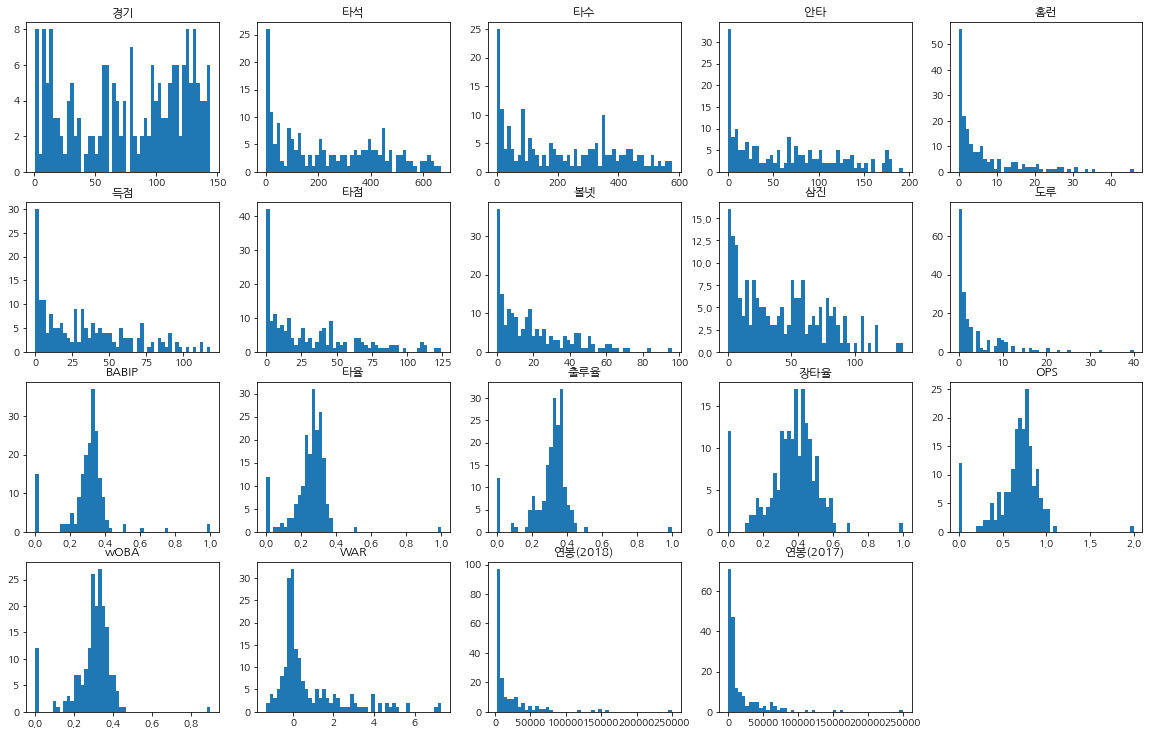

In [13]:
batter_features_df=batter[['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)', '연봉(2017)']]
def plt_hist_each_column(df):
    plt.rcParams['figure.figsize']=[20,16]
    fig=plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plt_hist_each_column(batter_features_df)

# 피처 스케일링

In [14]:
pd.options.mode.chained_assignment = None

def standard_scaling(df, scale_columns):
  for col in scale_columns:
    series_mean = df[col].mean()
    series_std = df[col].std()
    df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
  return df

scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR','연봉(2017)']

batter_df = standard_scaling(batter, scale_columns)
batter_df = batter_df.rename(columns={'연봉(2018)':'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


# 범주형 피처 정규화

In [15]:
# 팀명 피처를 one-hot encoding으로 변환
team_encoding = pd.get_dummies(batter_df['팀명'])
team_encoding.head(5)

,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [16]:
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)
batter_df.head(5)

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,0,0,0,0,1,0,0,0,0,0
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,1,0,0,0,0,0,0,0,0,0
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,0,0,0,0,0,0,1,0,0,0
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,0,0,0,1,0,0,0,0,0,0
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,0,0,0,0,0,0,0,1,0,0


#훈련 세트와 테스트 세트로 분리

In [17]:
X = batter_df[batter_df.columns.difference(['선수명','y'])]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)
print(X_train)

        BABIP  KIA  KT  LG  NC       OPS  SK       WAR      wOBA        경기  \
60   0.297656    0   0   0   0  0.397667   0 -0.082194  0.468820 -0.279463   
165 -0.428348    0   0   0   0 -0.167182   0 -0.722005 -0.145009 -0.455336   
161 -0.250709    0   0   0   0 -0.925579   0 -0.674611 -0.907646 -1.246765   
2    0.683829    0   0   0   0  1.318014   0  3.703353  1.212856  1.171489   
134  0.243592    0   1   0   0  0.081668   0 -0.550204  0.134004 -0.499304   
..        ...  ...  ..  ..  ..       ...  ..       ...       ...       ...   
19   0.351720    0   0   0   0  0.792665   0  1.416622  0.719933  0.709822   
168 -0.096240    0   0   0   0 -0.167182   0 -0.733853 -0.070605  1.105537   
98  -0.289326    0   0   0   0 -0.017082   1 -0.443569 -0.033404  0.797759   
110  0.475295    0   0   0   0 -0.024982   0 -0.490962 -0.014803  0.424029   
93  -0.173474    0   0   0   0  0.184367   0 -0.425796  0.208408  0.995616   

     ...        안타  연봉(2017)       장타율       출루율        타석     

In [18]:
X_train.shape


(152, 28)

In [19]:
X_test.shape

(39, 28)

In [20]:
Y_train.shape

(152,)

In [21]:
Y_test.shape

(39,)

8:2의 비율로 총 4개의 데이터 생성된 것을 확인할 수 있다.

In [22]:
# 선형회귀 모델 훈련 및 출력
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
print(lr.coef_)

[  -236.24898991    -97.66532469  -2503.58349949   1253.17014235
  -3501.99662009 -11839.60373399  -1204.5626795    2564.40299851
  32645.18415629    717.04409948  -2360.39995263    957.39849116
   1024.21094579  -2847.89149982   7454.13816003  11446.32337558
   -357.03685464   -508.91600818   7154.15488843  27033.31126951
  -5552.94435452 -19251.75812435 -70019.74085914  58253.63806387
   2589.90191245  -2754.62215006    293.72568287   3918.74111401]


# OLS 회귀 분석 결과

In [23]:
!pip install statsmodels
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     64.25
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.80e-60
Time:                        12:04:50   Log-Likelihood:                -1567.4
No. Observations:                 152   AIC:                             3189.
Df Residuals:                     125   BIC:                             3270.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.917e+04    602.240     31.830      0.000     1.8e+04    2.04e+04
BABIP       -236.2490   1503.349     -0.157      0.875   -3211.562    2739.065
KIA         1819.2924   2320.077      0.784      0.434   -2772.428    6411.013
KT          -586.6258   2197.943     -0.267      0.790   -4936.628    3763.377
LG          3170.1278   2063.356      1.536      0.127    -913.510    7253.766
NC         -1585.0389   2035.486     -0.779      0.438   -5613.518    2443.440
OPS        -1.184e+04   9690.952     -1.222      0.224    -3.1e+04    7339.993
SK           712.3950   2066.385      0.345      0.731   -3377.238    4802.028
WAR         2564.4030   3269.079      0.784      0.434   -3905.511    9034.317
wOBA        3.265e+04   2.89e+04      1.131      0.260   -2.45e+04    8.98e+04
경기           717.0441   2667.842      0.269      0.789   -4562.946    5997.035
넥센          -443.4422   1948.813     -0.228      0.820   -4300.385    3413.500
도루           957.3985   1020.277      0.938      0.350   -1061.856    2976.653
두산          2941.1687   2323.069      1.266      0.208   -1656.473    7538.811
득점         -2847.8915   3430.496     -0.830      0.408   -9637.270    3941.487
롯데          9371.0959   2199.008      4.262      0.000    5018.987    1.37e+04
볼넷          1.145e+04   3583.856      3.194      0.002    4353.427    1.85e+04
삼성          1559.9209   2002.284      0.779      0.437   -2402.848    5522.690
삼진          -508.9160   2282.110     -0.223      0.824   -5025.495    4007.663
안타          7154.1549   1.13e+04      0.632      0.528   -1.52e+04    2.95e+04
연봉(2017)    2.703e+04   1245.371     21.707      0.000    2.46e+04    2.95e+04
장타율        -5552.9444   5745.149     -0.967      0.336   -1.69e+04    5817.418
출루율        -1.925e+04   1.48e+04     -1.297      0.197   -4.86e+04    1.01e+04
타석         -7.002e+04   3.76e+04     -1.863      0.065   -1.44e+05    4377.499
타수          5.825e+04   3.94e+04      1.479      0.142   -1.97e+04    1.36e+05
타율          2589.9019   3295.695      0.786      0.433   -3932.688    9112.492
타점         -2754.6222   3846.260     -0.716      0.475   -1.04e+04    4857.604
한화          2210.6834   1981.938      1.115      0.267   -1711.818    6133.185
홈런          3918.7411   3053.614      1.283      0.202   -2124.739    9962.222
==============================================================================
Omnibus:                      115.076   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.469
Skew:                           2.223   Prob(JB):                         0.00
Kurtosis:                      24.344   Cond. No.                     6.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'OPS'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'wOBA'),
 Text(0, 0, '경기'),
 Text(0, 0, '넥센'),
 Text(0, 0, '도루'),
 Text(0, 0, '두산'),
 Text(0, 0, '득점'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진'),
 Text(0, 0, '안타'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '장타율'),
 Text(0, 0, '출루율'),
 Text(0, 0, '타석'),
 Text(0, 0, '타수'),
 Text(0, 0, '타율'),
 Text(0, 0, '타점'),
 Text(0, 0, '한화'),
 Text(0, 0, '홈런')]

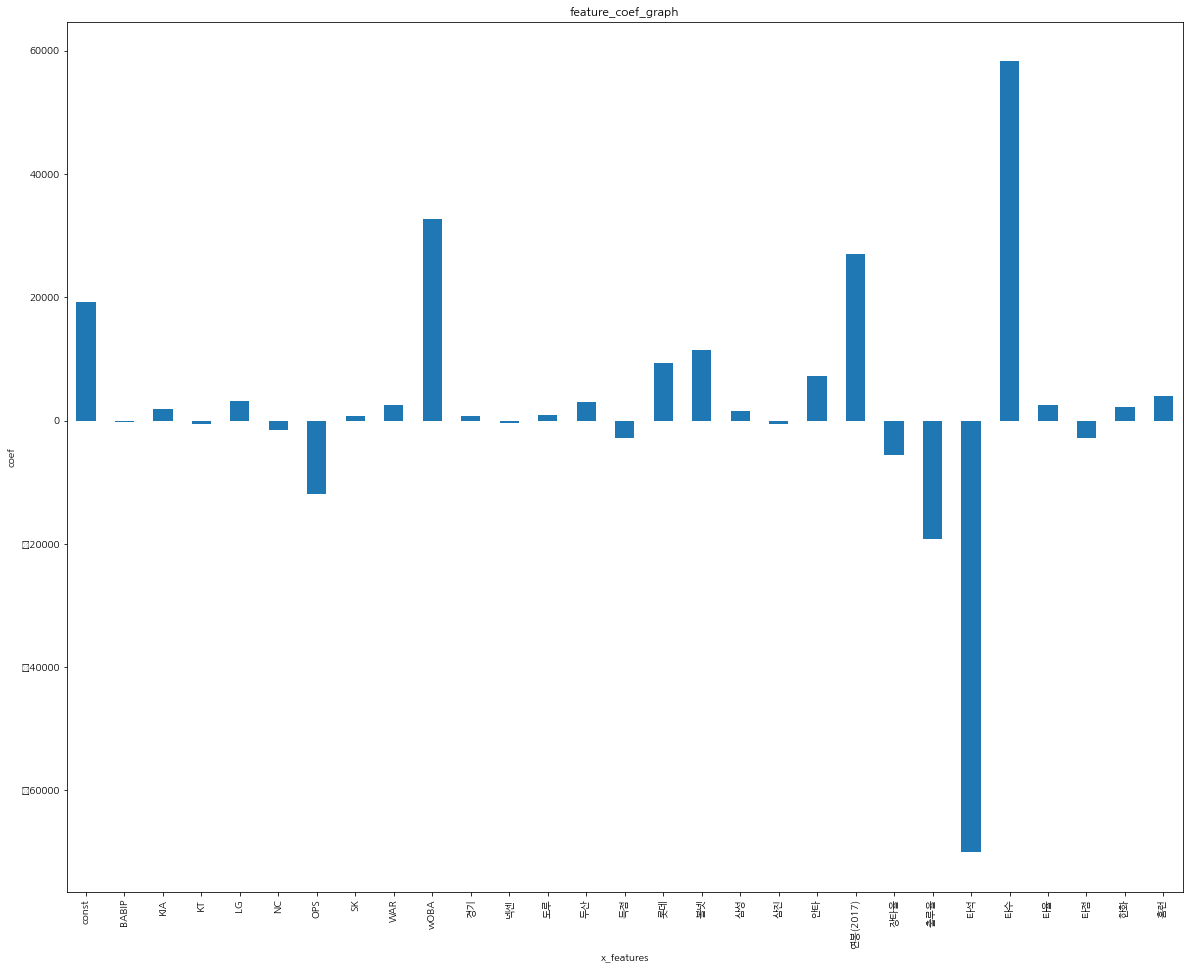

In [25]:
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

plt.rc('font', family='NanumGothic')
x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### 분석
OLS 모델이 학습한 회귀 계수들 시각화하여 그래프로 나타낸 결과 OPS, wOBA,출루율, 연봉(2017), 타석, 타수 피처가 영향력이 큰 것으로 확인된다

# 유의미한 피처들과, 영향력 높은 피처들 설명

* OLS 회귀 분석에서는 p-value값이 0.05미만으로 나타나는 볼넷, 연봉(2017), 팀(롯데)이 유의미한 피처로 나타났다.
* 또한, OLS 모델이 학습한 회귀 계수들을 시각화하여 분석한 결과 OPS, wOBA,출루율, 연봉(2017), 타석, 타수 피처가 영향력이 큰 것으로 확인되었다.

**이 두가지를 표로 정리하면 다음과 같다**

|피처명|유의미한 피처인가?|영향력이 큰 피처인가?|
|------|---|---|
|볼넷|O|△|
|롯데|O|△|
|wOBA|X|O|
|연봉(2017)|O|O|
|출루율|X|O|
|OPS|X|O|
|출루율|X|O|
|타석|X|O|
|타수|X|O|


#피처들간의 상관 관계 분석

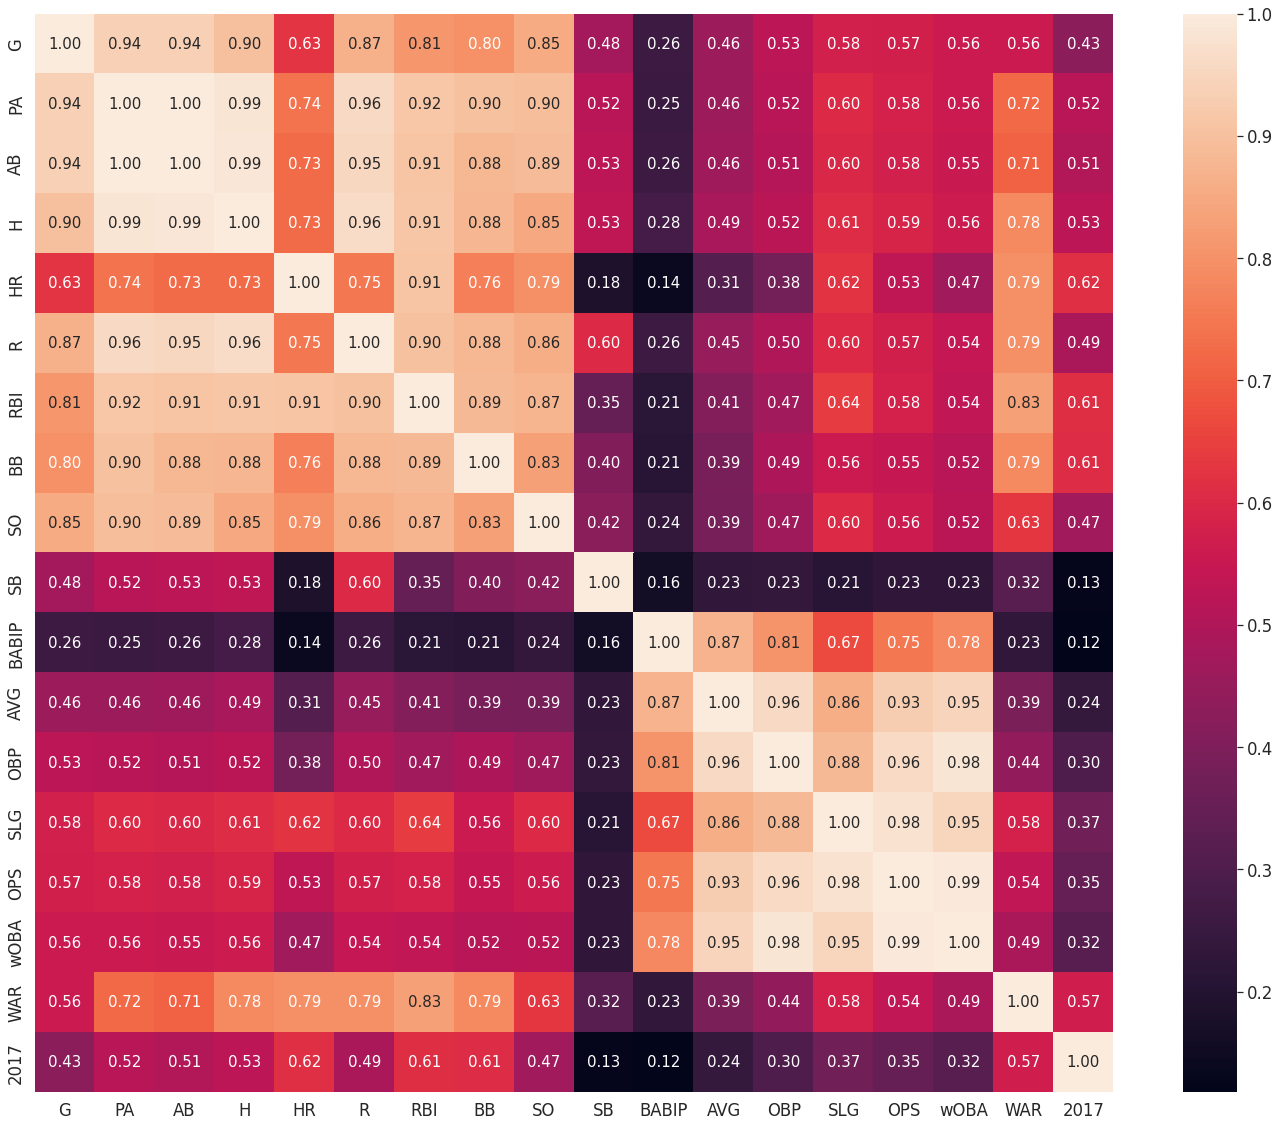

In [26]:
# 피처간의 상관계수 행렬을 계산합니다.
corr = batter_df[scale_columns].corr(method='pearson')
show_cols = ['G', 'PA', 'AB', 'H', 'HR', 'R', 'RBI', 'BB', 'SO', 'SB', 'BABIP', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WAR', '2017']
# ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR','연봉(2017)']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

분석 : wOBA - OPS, wOBA - OBP(출루율), OPS - SLG(장타율), H(안타) - PA(타석), AB(타수) - H(안타)등의 피처 쌍에서 높은 연관성이 발견되었다.

# 다중 공선성 확인하고 분석

In [27]:
# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
X = batter_df[batter_df.columns.difference(['선수명','y'])]
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,6.0,BABIP
1,1.1,KIA
2,1.1,KT
3,1.2,LG
4,1.1,NC
5,inf,OPS
6,1.2,SK
7,21.5,WAR
8,2190.9,wOBA
9,14.4,경기


분석 :  OPS = (장타율) + (출루율)이라서 OPS, 장타율, 출루율 피처들의 VIF값이 inf(무한대)로 강한 상호 연관성을 갖는다.

# 삭제가 필요한 피처들 설명



1. VIF 계수가 높은 피처들을 우선적으로 제거(비정상적으로 높은 피처들 제거) -> 장타율, 출루율, OPS

  하지만, 앞서 언급한것과 같이 OPS = (장타율) + (출루율)로 서로 강한 상호 연관성을 갖고, 상관관계 히트맵의 결과 이 셋의 높은 연관성이 발견되었기 때문에 OPS만 남겨두고 장타율과 출루율을 제거한다.  

2. 다시 공선성 검증 

3. 여전히 VIF 계수가 높은 피처들 제거 -> 타석, 타수 제거(안타와 타석, 타수의 상관관계의 연관도가 매우 높으므로 타석과 타수 제거)

4. 다시 공선성 검증
5. 여전히 VIF 계수가 높은 피처들 제거 -> OPS와 wOBA가 상관관계 히트맵에서 높은 연관성을 보여주므로 OPS 제거

6. 다시 공선성 검증
7. 여전히 VIF 계수가 높은 피처들 제거 -> 안타와 득점 중 득점 제거
8. 공선성 검증
9. 여전히 VIF 계수가 높은 피처들 제거 -> 안타와 타점 중 타점 제거
10. 공선성 검증
11. 여전히 VIF 계수가 높은 피처들 제거 -> 타율과 wOBA 중 타율 제거'

타율은 4사구의 가치를 무시할 뿐만 아니라 안타의 유형별 차이도 인정하지 않기 때문에 타자의 득점 기여도를 제대로 측정하지 못한다. 4사구를 포함하는 출루율은 좀 더 낫지만 결과를 성공(1) 아니면 실패(0)로 이분한다는 점은 타율과 같다. 반대로 장타율은 4사구를 포함하진 않으나 안타 유형별 가치 차이는 부정확하게나마 반영한다. 또한, OPS는 분명 그 단순함에 비해 놀랍도록 우수한 지표지만 가중치를 분석해보면 4사구의 가치를 과소평가하는 문제가 있다고 한다.

그러므로 타율을 제거
12. 공선성 검증
13. 여전히 VIF 계수가 높은 피처들 제거 -> 안타 제거

그러므로 삭제가 필요한 피처는 ['타율','장타율','OPS','출루율','타석','타수','득점','타점','안타','선수명','y']이다. 

In [29]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
X = batter_df[batter_df.columns.difference(['타율','장타율','OPS','출루율','선수명','타석','타수','득점','타점','안타','y'])]
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.5,BABIP
1,1.1,KIA
2,1.0,KT
3,1.1,LG
4,1.0,NC
5,1.1,SK
6,4.8,WAR
7,4.8,wOBA
8,5.3,경기
9,1.0,넥센


# R2 score

In [30]:
# 학습 데이터와 테스트 데이터로 분리
X = batter_df[batter_df.columns.difference(['선수명','y'])]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.930376695167735
0.9605253564830736


훈련 세트와 테스트 세트에 대한 평가 점수의 격차가 그리 크지않은 것으로 보아 모델이 훈련 세트에 적합한 것으로 보인다.
또한, 두 세트 모두 1에 가까운것으로 보아 어느정도 정확한 예측이 된 것으로 추정된다.

# RMSE score

In [31]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

7281.255444348115
8904.286755840136


이 값이 높을수록 예측이 부정확하다는 것을 의미하므로 어느정도 정확하다는 것을 알 수 있음

# 4번 반복

다중공선성 확인 과정을 반복해서 남은 피처들 중 앞서 분석한 유의미한 피처들과 영향력 높은 피처들을 위주로 피처들을 선정

**<다중공선성 확인 과정을 반복해서 남은 피처>**<br>
KIA, KT, LG, NC, SK, WAR, wOBA, 경기, 넥센, 도루, 두산, 롯데, 볼넷, 삼성, 삼진, 연봉(2017), 한화, 홈런

### 1번

다중공선성 확인 과정을 반복해서 남은 피처 중 유의미한 피처 및 영향력 높은 피처의 교집합인 피처들


In [32]:
# 피처를 재선정합니다.
X = batter_df[['wOBA', '롯데','볼넷', '연봉(2017)']]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9146698407992817
0.9598138657002947


In [33]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

8060.838651778717
8984.173803068243


### 2번

위의 선정한 피처 중 '삼진' 피처 추가 -> 왜냐하면 야구에서 삼진이라는 피처가 타율에 중요하기 때문이다.

In [34]:
# 피처를 재선정합니다.
X = batter_df[['wOBA', '롯데','삼진','볼넷', '홈런', '연봉(2017)']]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9190832529040908
0.9635091744223055


In [35]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

7849.611415098639
8561.14541587792


### 3번

이번에는 팀명이 예측 모델에 도움이 될 것 같지않아서 팀명대신 WAR을 넣었다.

In [36]:
# 피처를 재선정합니다.
X = batter_df[['wOBA', 'WAR','삼진','볼넷', '홈런', '연봉(2017)']]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9171384330535692
0.9617493418381619


In [37]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

7943.383330785531
8765.15267974799


### 4번

팀명과 WAR을 둘 다 넣었다.

In [38]:
# 피처를 재선정합니다.
X = batter_df[['wOBA', 'WAR','롯데','삼진','볼넷', '홈런', '연봉(2017)']]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=19)

# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9229934091040725
0.9641573701352509


In [39]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

7657.603916534934
8484.767827879603


# 앞에서의 분석 결과로 필요한 피처들 선정하고 선정한 이유에 대해서 설명





선정한 피처 : 'wOBA', 'WAR','롯데','삼진','볼넷', '홈런', '연봉(2017)'<br>
선정된 피처에 따른 R2평가와 RMSE 평가를 분석한 결과 4번의 R2 평가에서의 훈련 세트와 테스트 세트에 대한 평가 점수의 격차가 제일 적고, RMSE 점수값이 나머지보다 값이 낮아서 예측이 이중에서 가장 정확하므로 선정하였다. 

# 선정된 피처들도 다시 학습 진행

In [40]:
# 피처를 재선정합니다.
X = batter_df[['wOBA', 'WAR','롯데','삼진','볼넷', '홈런', '연봉(2017)']]
Y = batter_df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=19)

In [41]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)

In [42]:
# 결과를 출력합니다.
print(model.score(X_train, Y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, Y_test)) # test R2 score를 출력합니다.

0.9229934091040725
0.9641573701352509


두 세트에 대한 평가 점수의 격차는 0.0411639610311784이고, 훈련 세트보다 테스트 세트의 점수가 높아서 과소적합이다.

In [43]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7657.603916534934
8484.767827879603


# 예측 연봉과 실제 연봉을 비교하는 시각화

In [44]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = batter_df[['wOBA', 'WAR','롯데','삼진','볼넷', '홈런', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
batter_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [45]:
# 원래의 데이터 프레임을 다시 로드합니다.
batter = pd.read_csv(io.BytesIO(batter_file_path['batter_stats_2017.csv']))
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = batter_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(batter, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,3,손아섭,150000,88321.197328,65000
1,4,러프,140000,114928.119774,110000
2,9,번즈,73000,68336.538256,60000
3,10,스크럭스,70000,89196.474729,80000
4,17,양의지,60000,53976.278962,48000
5,20,손시헌,50000,41856.308484,40000
6,21,로맥,50000,37455.129047,30000
7,23,나성범,43000,48087.822754,35000
8,25,이용규,40000,80063.776717,90000
9,28,김주찬,40000,60405.947079,60000


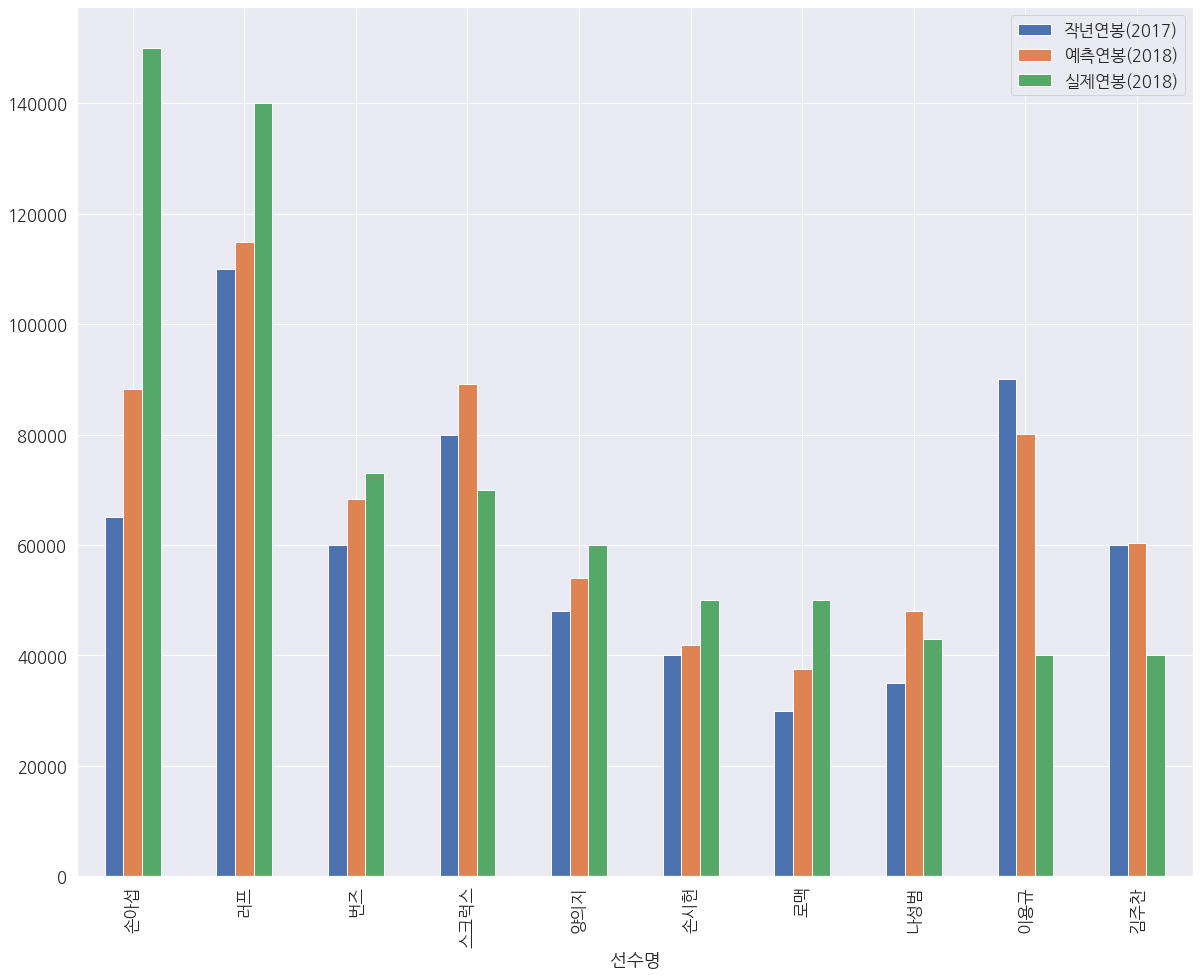

In [46]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
plt.rc('font', family='NanumGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")